In [1]:
#Loading the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
#Loading the DataSet

df = pd.read_csv("InstagramData.csv",encoding='ISO-8859-1')

In [3]:
#Displaying the first few rows of the dataset

df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [4]:
# There are no missing values in this dataset

df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [5]:
# There are 15 columns in this Dataset (after sentiment analysis)

df.shape[1]

13

In [6]:
# Sentiment Analysis

sia = SentimentIntensityAnalyzer()

def classify_sentiment(text):
    score = sia.polarity_scores(text)
    compound_score = score['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Caption_Sentiment'] = df['Caption'].apply(classify_sentiment)

df['Hashtags_Sentiment'] = df['Hashtags'].apply(classify_sentiment)

print(df[['Caption', 'Caption_Sentiment']].head(10))
print()
print(df[['Hashtags', 'Hashtags_Sentiment']].head(10))

                                             Caption Caption_Sentiment
0  Here are some of the most important data visua...          Positive
1  Here are some of the best data science project...          Positive
2  Learn how to train a machine learning model an...          Positive
3  Heres how you can write a Python program to d...          Positive
4  Plotting annotations while visualizing your da...          Positive
5  Here are some of the most important soft skill...          Positive
6  Learn how to analyze a candlestick chart as a ...          Positive
7  Here are some of the best books that you can f...          Positive
8  Here are some of the best data analysis projec...          Positive
9  Here are two best ways to count the number of ...          Positive

                                            Hashtags Hashtags_Sentiment
0  #finance #money #business #investing #investme...            Neutral
1  #healthcare #health #covid #data #datascience ...            Neutral
2 

In [7]:
# After sentiment analysis there are 2 more object type columns

df.dtypes

Impressions            int64
From Home              int64
From Hashtags          int64
From Explore           int64
From Other             int64
Saves                  int64
Comments               int64
Shares                 int64
Likes                  int64
Profile Visits         int64
Follows                int64
Caption               object
Hashtags              object
Caption_Sentiment     object
Hashtags_Sentiment    object
dtype: object

In [8]:
# Statistical Analysis For Impressions Column 

print("Count: ",df["Impressions"].count())
print("Mean: ",df["Impressions"].mean())
print("Standard Deviation: ",df["Impressions"].std())
print("Median: ",df["Impressions"].median())
print("Min-value: ",df["Impressions"].min())
print("Max-value",df["Impressions"].max())
print("Quantile-25%: ",df["Impressions"].quantile(0.25))
print("Quantile-75%: ",df['Impressions'].quantile(0.75))

Count:  119
Mean:  5703.991596638655
Standard Deviation:  4843.780104765143
Median:  4289.0
Min-value:  1941
Max-value 36919
Quantile-25%:  3467.0
Quantile-75%:  6138.0


In [9]:
# Statistical Analysis For From Home Column

print("Count: ",df["From Home"].count())
print("Mean: ",df["From Home"].mean())
print("Standard Deviation: ",df["From Home"].std())
print("Median: ",df["From Home"].median())
print("Min-value: ",df["From Home"].min())
print("Max-value",df["From Home"].max())
print("Quantile-25%: ",df["From Home"].quantile(0.25))
print("Quantile-75%: ",df['From Home'].quantile(0.75))

Count:  119
Mean:  2475.7899159663866
Standard Deviation:  1489.3863477213717
Median:  2207.0
Min-value:  1133
Max-value 13473
Quantile-25%:  1945.0
Quantile-75%:  2602.5


In [10]:
# Statistical Analysis For From Hashtags Column 

print("Count: ",df["From Hashtags"].count())
print("Mean: ",df["From Hashtags"].mean())
print("Standard Deviation: ",df["From Hashtags"].std())
print("Median: ",df["From Hashtags"].median())
print("Min-value: ",df["From Hashtags"].min())
print("Max-value",df["From Hashtags"].max())
print("Quantile-25%: ",df["From Hashtags"].quantile(0.25))
print("Quantile-75%: ",df['From Hashtags'].quantile(0.75))

Count:  119
Mean:  1887.5126050420167
Standard Deviation:  1884.361443186678
Median:  1278.0
Min-value:  116
Max-value 11817
Quantile-25%:  726.0
Quantile-75%:  2363.5


In [11]:
# Statistical Analysis For From Explore Column 

print("Count: ",df["From Explore"].count())
print("Mean: ",df["From Explore"].mean())
print("Standard Deviation: ",df["From Explore"].std())
print("Median: ",df["From Explore"].median())
print("Min-value: ",df["From Explore"].min())
print("Max-value",df["From Explore"].max())
print("Quantile-25%: ",df["From Explore"].quantile(0.25))
print("Quantile-75%: ",df['From Explore'].quantile(0.75))

Count:  119
Mean:  1078.1008403361345
Standard Deviation:  2613.026131904585
Median:  326.0
Min-value:  0
Max-value 17414
Quantile-25%:  157.5
Quantile-75%:  689.5


In [12]:
# Statistical Analysis For From Other Column 

print("Count: ",df["From Other"].count())
print("Mean: ",df["From Other"].mean())
print("Standard Deviation: ",df["From Other"].std())
print("Median: ",df["From Other"].median())
print("Min-value: ",df["From Other"].min())
print("Max-value",df["From Other"].max())
print("Quantile-25%: ",df["From Other"].quantile(0.25))
print("Quantile-75%: ",df['From Other'].quantile(0.75))

Count:  119
Mean:  171.0924369747899
Standard Deviation:  289.4310313208804
Median:  74.0
Min-value:  9
Max-value 2547
Quantile-25%:  38.0
Quantile-75%:  196.0


In [13]:
# Statistical Analysis For Saves Column 

print("Count: ",df["Saves"].count())
print("Mean: ",df["Saves"].mean())
print("Standard Deviation: ",df["Saves"].std())
print("Median: ",df["Saves"].median())
print("Min-value: ",df["Saves"].min())
print("Max-value",df["Saves"].max())
print("Quantile-25%: ",df["Saves"].quantile(0.25))
print("Quantile-75%: ",df['Saves'].quantile(0.75))

Count:  119
Mean:  153.3109243697479
Standard Deviation:  156.31773096881872
Median:  109.0
Min-value:  22
Max-value 1095
Quantile-25%:  65.0
Quantile-75%:  169.0


In [14]:
# Statistical Analysis For Comments Column 

print("Count: ",df["Comments"].count())
print("Mean: ",df["Comments"].mean())
print("Standard Deviation: ",df["Comments"].std())
print("Median: ",df["Comments"].median())
print("Min-value: ",df["Comments"].min())
print("Max-value",df["Comments"].max())
print("Quantile-25%: ",df["Comments"].quantile(0.25))
print("Quantile-75%: ",df['Comments'].quantile(0.75))

Count:  119
Mean:  6.663865546218488
Standard Deviation:  3.54457645129247
Median:  6.0
Min-value:  0
Max-value 19
Quantile-25%:  4.0
Quantile-75%:  8.0


In [15]:
# Statistical Analysis For Shares Column 

print("Count: ",df["Shares"].count())
print("Mean: ",df["Shares"].mean())
print("Standard Deviation: ",df["Shares"].std())
print("Median: ",df["Shares"].median())
print("Min-value: ",df["Shares"].min())
print("Max-value",df["Shares"].max())
print("Quantile-25%: ",df["Shares"].quantile(0.25))
print("Quantile-75%: ",df['Shares'].quantile(0.75))

Count:  119
Mean:  9.361344537815127
Standard Deviation:  10.08920474637055
Median:  6.0
Min-value:  0
Max-value 75
Quantile-25%:  3.0
Quantile-75%:  13.5


In [16]:
# Statistical Analysis For Likes Column 

print("Count: ",df["Likes"].count())
print("Mean: ",df["Likes"].mean())
print("Standard Deviation: ",df["Likes"].std())
print("Median: ",df["Likes"].median())
print("Min-value: ",df["Likes"].min())
print("Max-value",df["Likes"].max())
print("Quantile-25%: ",df["Likes"].quantile(0.25))
print("Quantile-75%: ",df['Likes'].quantile(0.75))

Count:  119
Mean:  173.78151260504202
Standard Deviation:  82.37894659292769
Median:  151.0
Min-value:  72
Max-value 549
Quantile-25%:  121.5
Quantile-75%:  204.0


In [17]:
# Statistical Analysis For Profile Visits Column 

print("Count: ",df["Profile Visits"].count())
print("Mean: ",df["Profile Visits"].mean())
print("Standard Deviation: ",df["Profile Visits"].std())
print("Median: ",df["Profile Visits"].median())
print("Min-value: ",df["Profile Visits"].min())
print("Max-value",df["Profile Visits"].max())
print("Quantile-25%: ",df["Profile Visits"].quantile(0.25))
print("Quantile-75%: ",df['Profile Visits'].quantile(0.75))

Count:  119
Mean:  50.621848739495796
Standard Deviation:  87.08840157035046
Median:  23.0
Min-value:  4
Max-value 611
Quantile-25%:  15.0
Quantile-75%:  42.0


In [18]:
# Statistical Analysis For Follows Column 

print("Count: ",df["Follows"].count())
print("Mean: ",df["Follows"].mean())
print("Standard Deviation: ",df["Follows"].std())
print("Median: ",df["Follows"].median())
print("Min-value: ",df["Follows"].min())
print("Max-value",df["Follows"].max())
print("Quantile-25%: ",df["Follows"].quantile(0.25))
print("Quantile-75%: ",df['Follows'].quantile(0.75))

Count:  119
Mean:  20.756302521008404
Standard Deviation:  40.92157989944948
Median:  8.0
Min-value:  0
Max-value 260
Quantile-25%:  4.0
Quantile-75%:  18.0


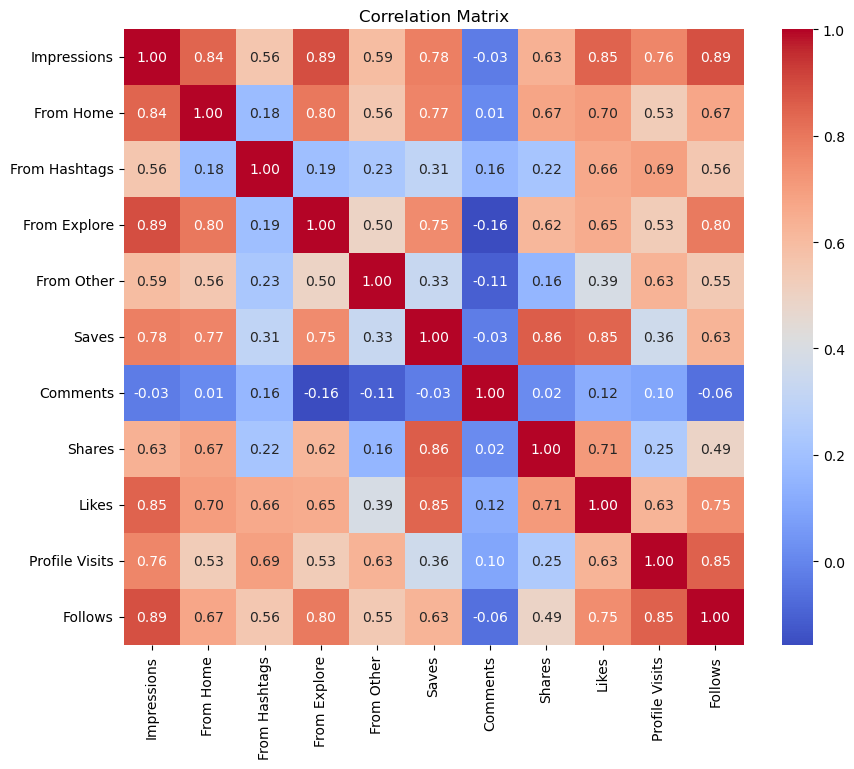

In [19]:
# Correlation Between each numeric column

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

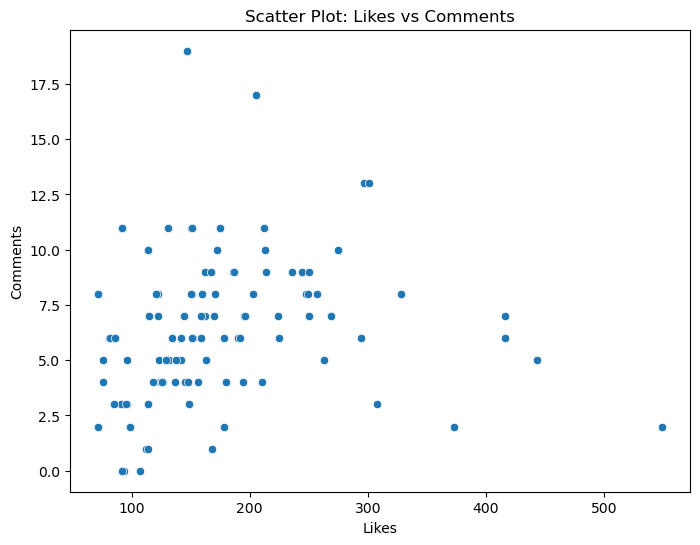

In [20]:
# Relationship between Likes and Comments

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Likes', y='Comments')
plt.title('Scatter Plot: Likes vs Comments')
plt.show()


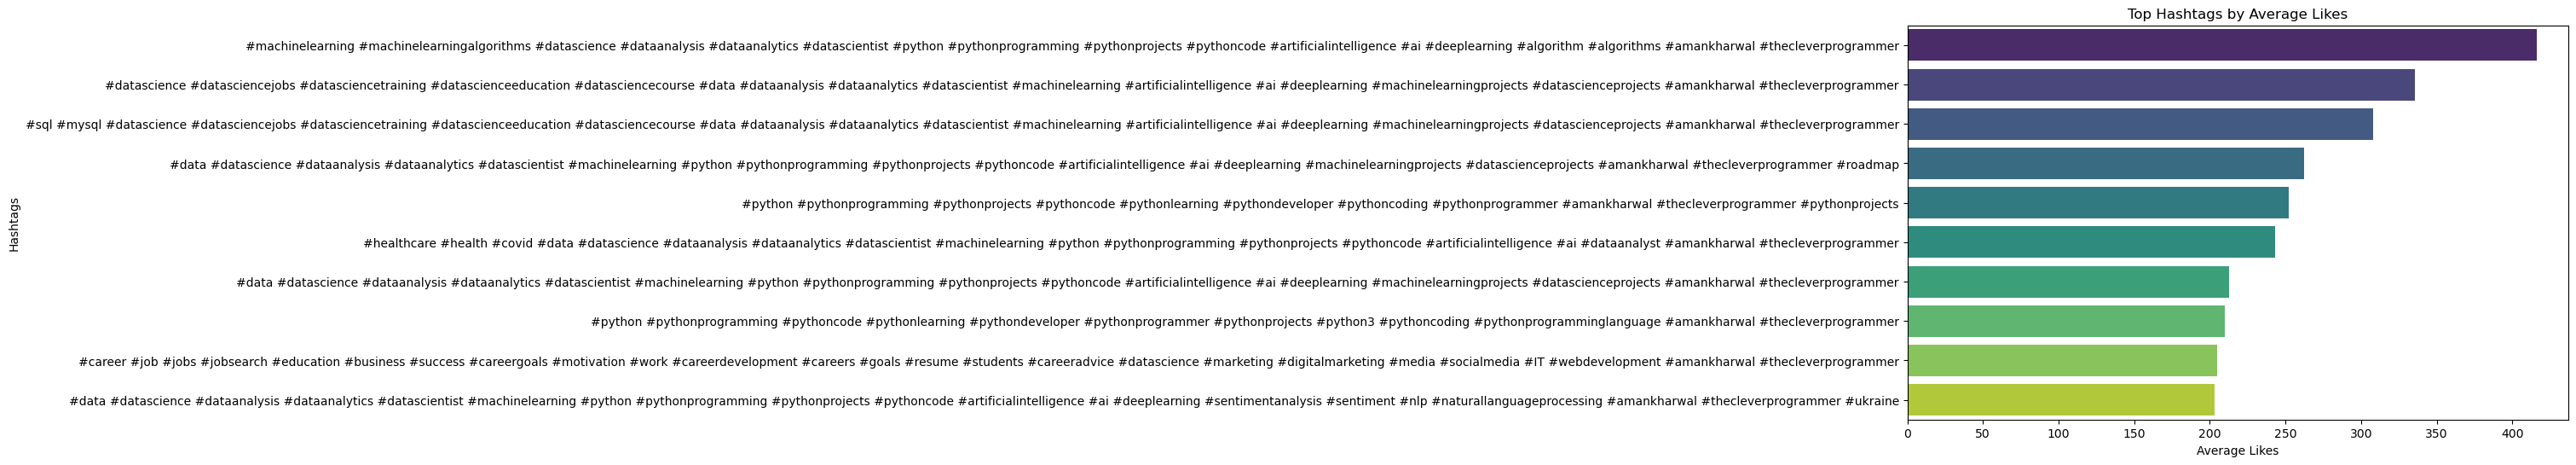

In [32]:
# Identifying the most Effective Hashtags 

hashtag_engagement = df.groupby('Hashtags').agg({
    'Likes': 'mean',
    'Comments': 'mean',
    'Shares': 'mean'
}).reset_index()

top_hashtags = hashtag_engagement.nlargest(10, 'Likes')  # Change 'Likes' to other metrics as needed

plt.figure(figsize=(10, 6))
sns.barplot(x='Likes', y='Hashtags', data=top_hashtags, palette='viridis')
plt.xlabel('Average Likes')
plt.ylabel('Hashtags')
plt.title('Top Hashtags by Average Likes')
plt.show()

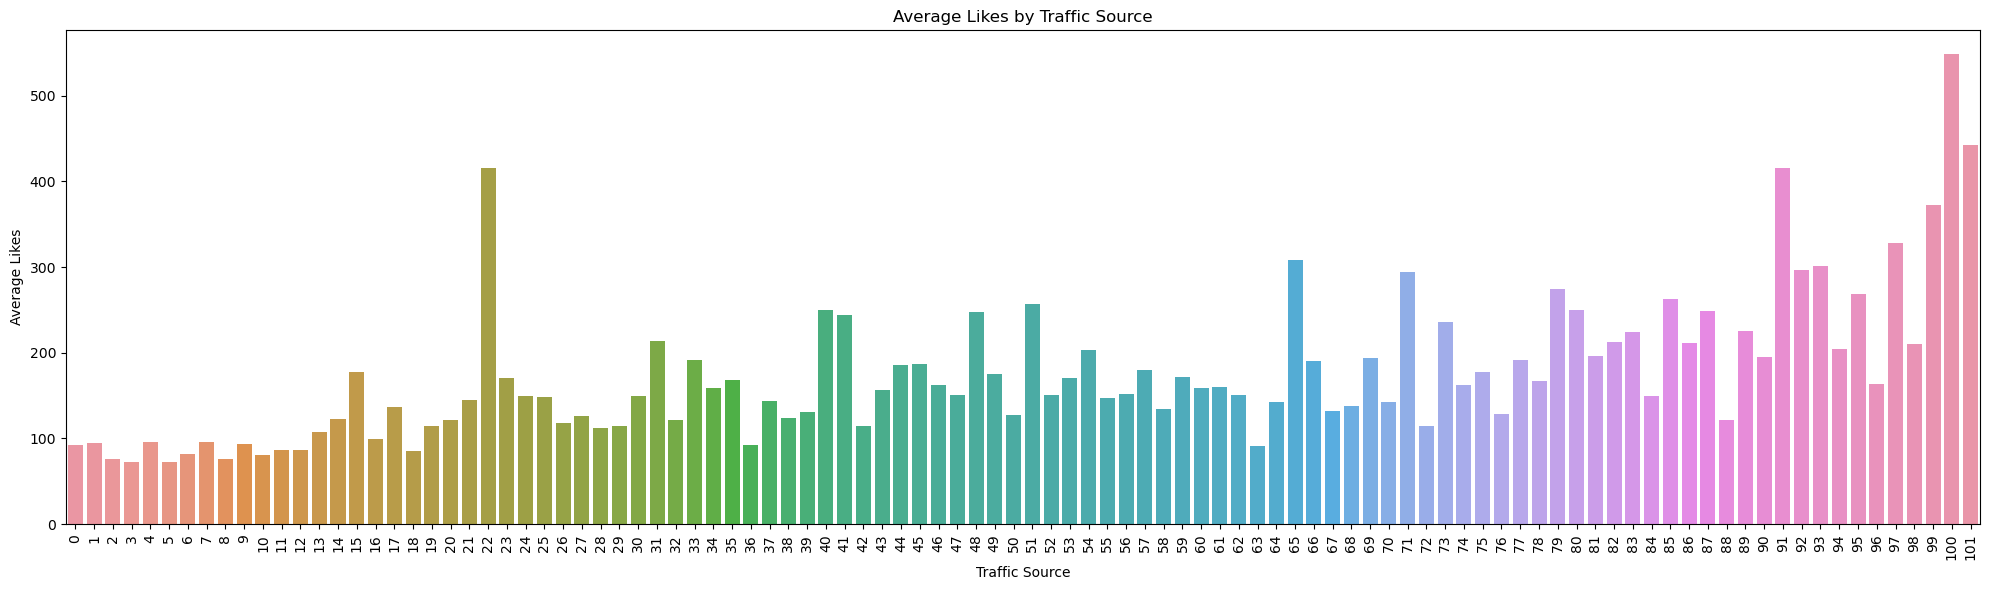

In [22]:
#Average Likes generated from Home page and Hashtags

traffic_engagement = df.groupby(['From Home', 'From Hashtags']).mean(numeric_only=True).reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(x='index', y='Likes', data=traffic_engagement.reset_index())
plt.xlabel('Traffic Source')
plt.ylabel('Average Likes')
plt.title('Average Likes by Traffic Source')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


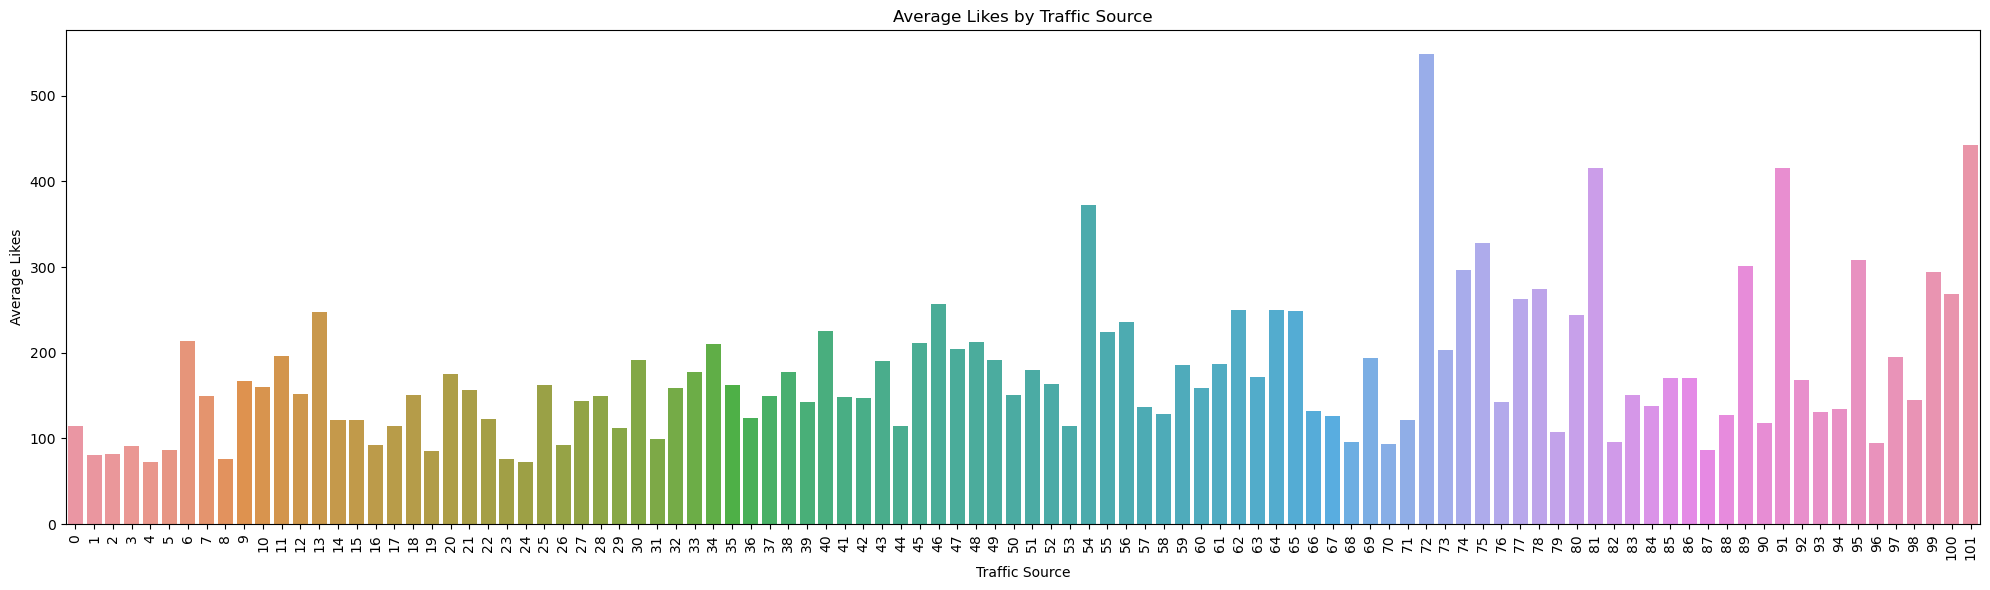

In [23]:
#Average Likes generated from other sources and Hashtags

traffic_engagement = df.groupby(['From Other', 'From Hashtags']).mean(numeric_only=True).reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(x='index', y='Likes', data=traffic_engagement.reset_index())
plt.xlabel('Traffic Source')
plt.ylabel('Average Likes')
plt.title('Average Likes by Traffic Source')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


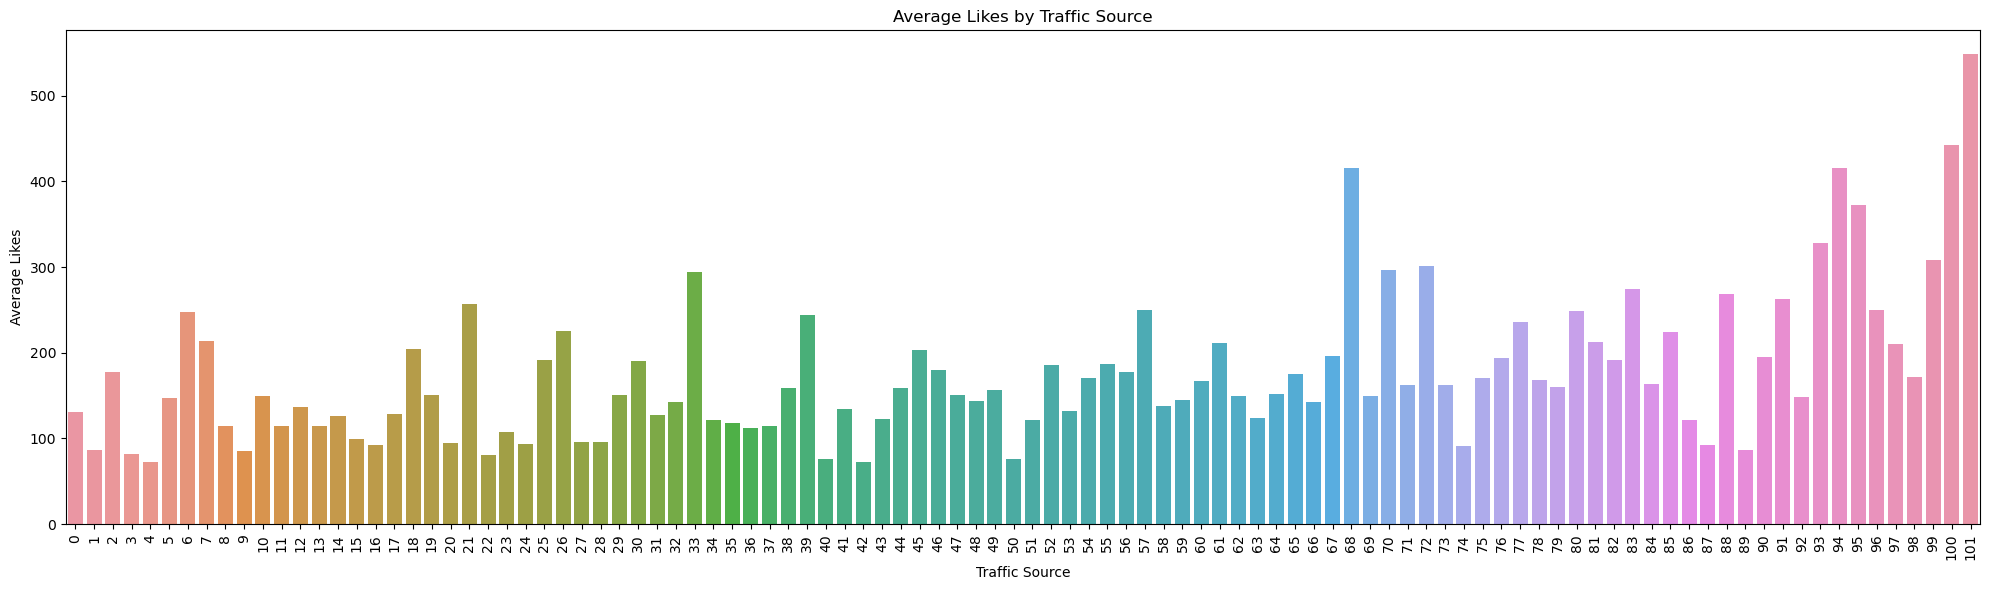

In [24]:
#Average Likes generated from Explore page and Hashtags

traffic_engagement = df.groupby(['From Explore', 'From Hashtags']).mean(numeric_only=True).reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(x='index', y='Likes', data=traffic_engagement.reset_index())
plt.xlabel('Traffic Source')
plt.ylabel('Average Likes')
plt.title('Average Likes by Traffic Source')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()


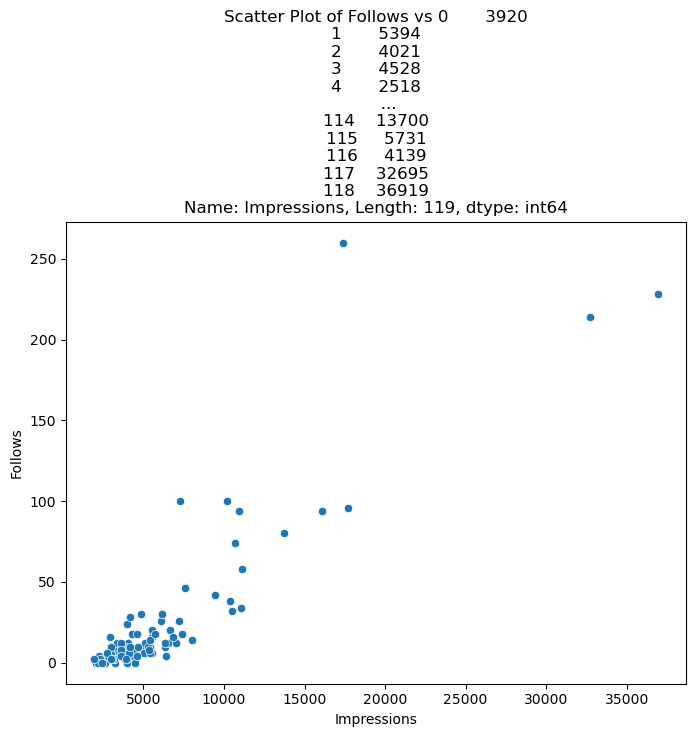

In [39]:
# Relationship between Follows and Impressions if any
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Impressions"], y='Follows', data=df)
plt.title(f'Scatter Plot of Follows vs {df["Impressions"]}')
plt.xlabel("Impressions")
plt.ylabel('Follows')
plt.show()

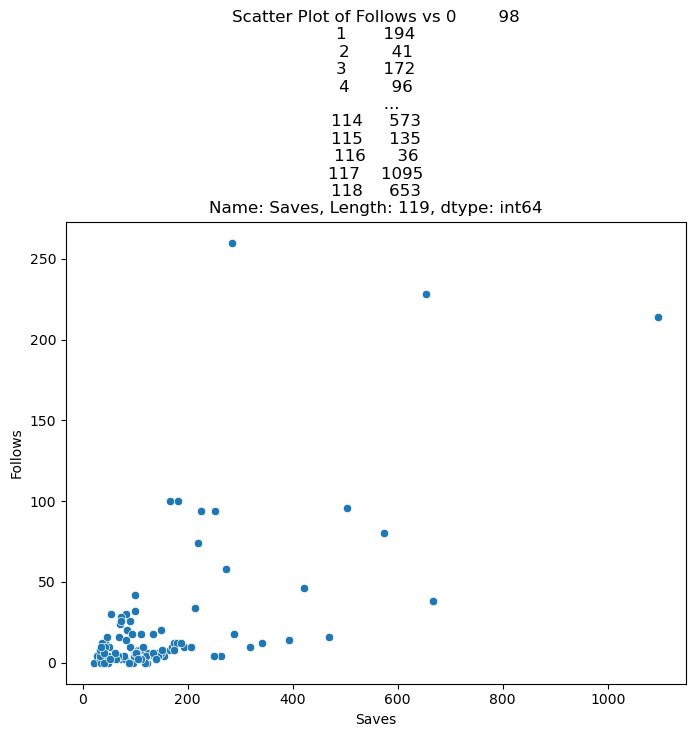

In [40]:
# Relationship between Follows and Impressions if any
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Saves"], y='Follows', data=df)
plt.title(f'Scatter Plot of Follows vs {df["Saves"]}')
plt.xlabel("Saves")
plt.ylabel('Follows')
plt.show()

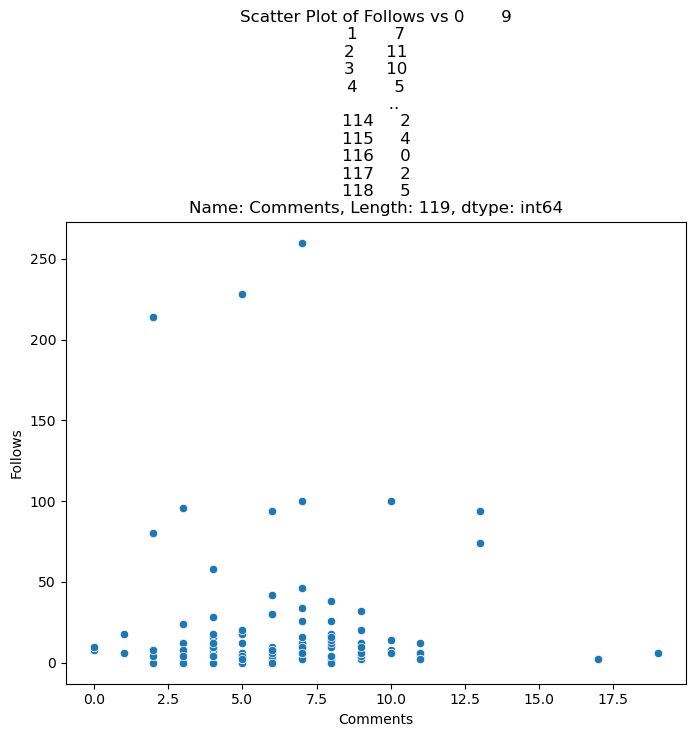

In [41]:
# Relationship between Follows and Impressions if any
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Comments"], y='Follows', data=df)
plt.title(f'Scatter Plot of Follows vs {df["Comments"]}')
plt.xlabel("Comments")
plt.ylabel('Follows')
plt.show()

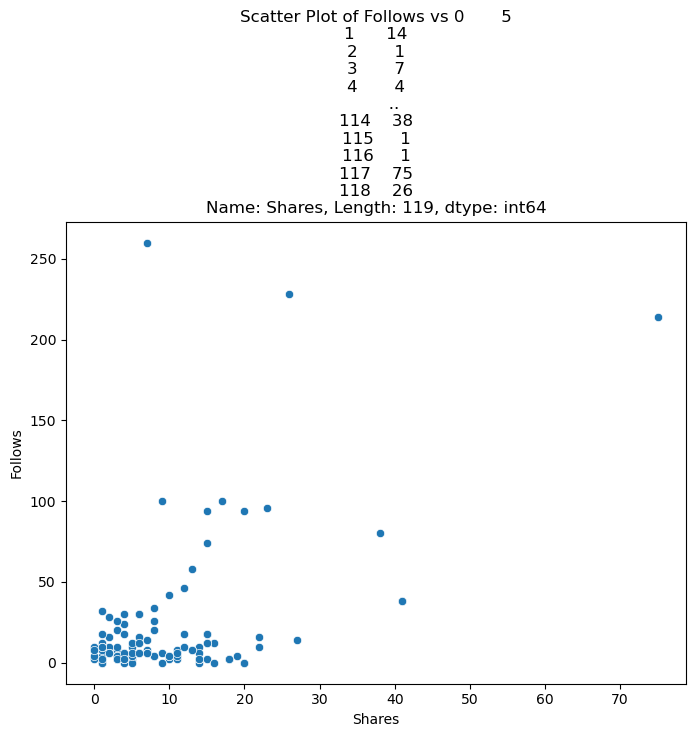

In [42]:
# Relationship between Follows and Impressions if any
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Shares"], y='Follows', data=df)
plt.title(f'Scatter Plot of Follows vs {df["Shares"]}')
plt.xlabel("Shares")
plt.ylabel('Follows')
plt.show()

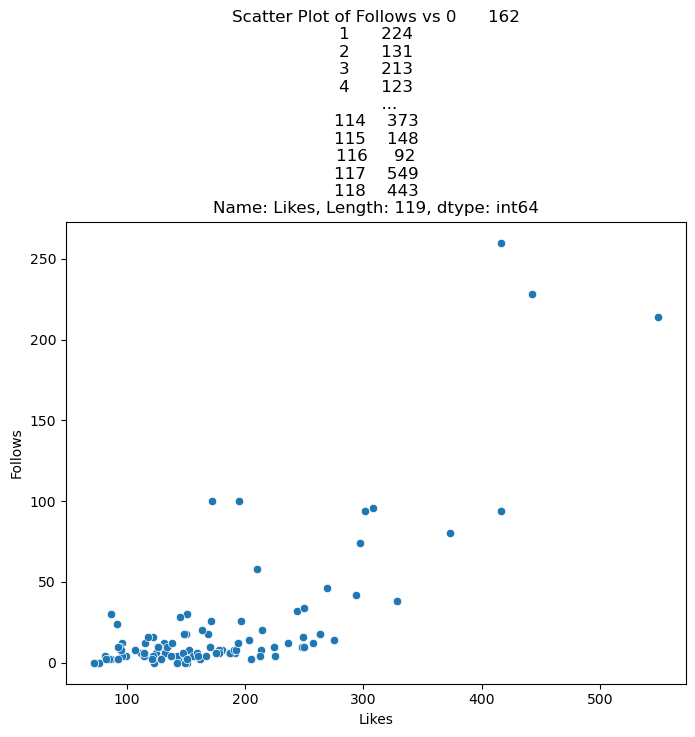

In [43]:
# Relationship between Follows and Impressions if any
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Likes"], y='Follows', data=df)
plt.title(f'Scatter Plot of Follows vs {df["Likes"]}')
plt.xlabel("Likes")
plt.ylabel('Follows')
plt.show()

In [26]:
# Regression Analysis (Targeted Variable = Follows)

X = df[['Impressions', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits']]
y = df['Follows']

model = LinearRegression()
model.fit(X, y)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients

,Feature,Coefficient
0,Impressions,0.003240
1,Saves,0.046929
2,Comments,-1.027640
3,Shares,0.058479
4,Likes,-0.036392
5,Profile Visits,0.257292


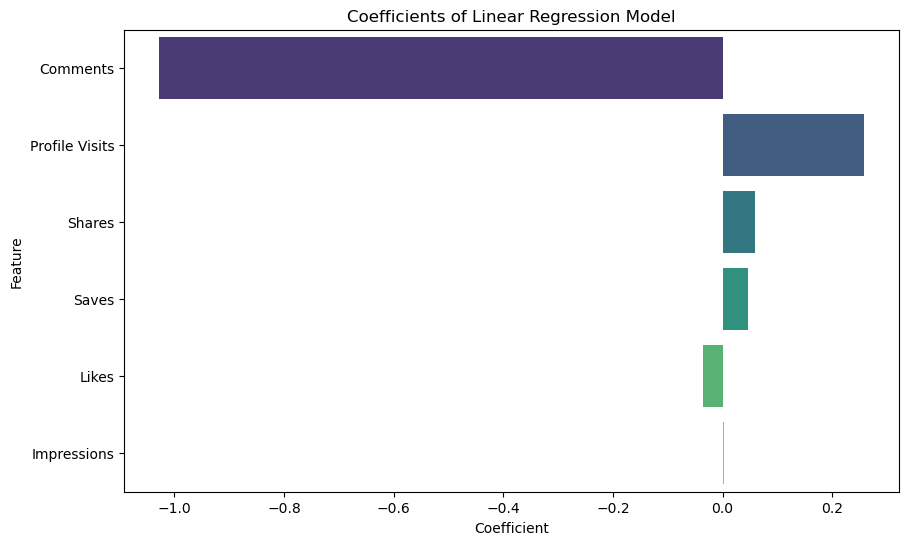

In [27]:
#Visualising the coefficients

coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Coefficients of Linear Regression Model')
plt.show()


In [28]:
#Regression Analysis Continues

model_rf = RandomForestRegressor()
model_rf.fit(X, y)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model_rf.feature_importances_})
feature_importances

,Feature,Importance
0,Impressions,0.515673
1,Saves,0.027201
2,Comments,0.008677
3,Shares,0.013864
4,Likes,0.175676
5,Profile Visits,0.258910


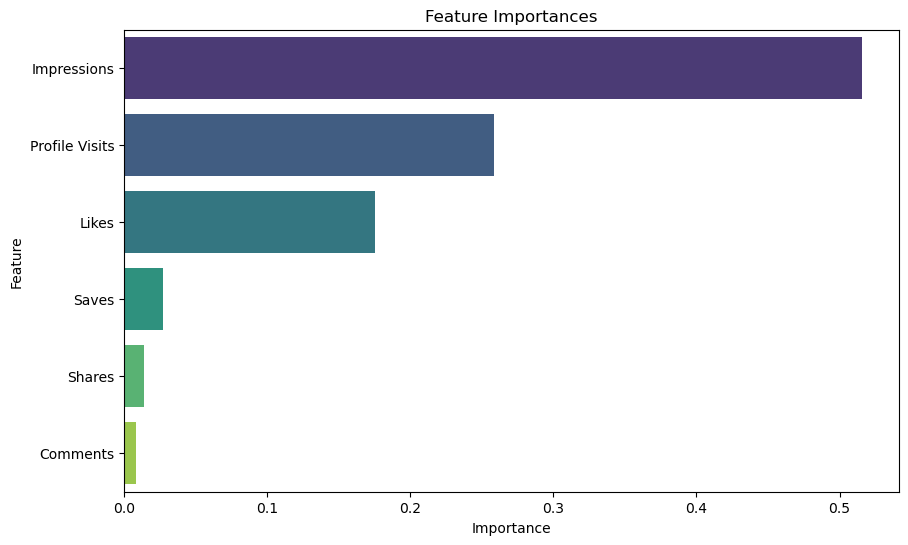

In [29]:
#Visualising the importance of the Features with respect to the Follows Column

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()
